In [1]:
%load_ext autoreload

In [2]:
autoreload 2

In [3]:
%matplotlib inline

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import pyreto

<h2> Forest fires </h2>

In [5]:
fire_size = pd.read_csv("http://tuvalu.santafe.edu/~aaronc/powerlaws/data/fires.txt", names=['acres'])

In [6]:
fire_size.describe()

,acres
count,203785.000000
mean,89.563111
std,2098.732181
min,0.100000
25%,0.100000
50%,0.200000
75%,2.000000
max,412050.000000


In [124]:
# check that I get same estimate for alpha given reported xmin...
desired_alpha, desired_xmin = 2.2, 6324
result1 = pyreto.distributions.Pareto.fit(fire_size.acres, scale=desired_xmin)

In [125]:
np.testing.assert_almost_equal(result1.params['b'] + 1, desired_alpha, decimal=1)

In [126]:
# check that I get the same estimates for both alpha and xmin using brute force minimization
result2 = pyreto.distributions.Pareto.fit(fire_size.acres, scale=None, quantile=0.999, method='brute')

In [127]:
np.testing.assert_almost_equal(result2.params['b'] + 1, desired_alpha, decimal=1)

In [128]:
np.testing.assert_almost_equal(result2.params['scale'], desired_xmin, decimal=1)

In [129]:
# check that I get the same estimates for both alpha and xmin using bounded minimization
result3 = pyreto.distributions.Pareto.fit(fire_size.acres, scale=None, quantile=0.999, method='bounded')

In [130]:
np.testing.assert_almost_equal(result3.params['b'] + 1, desired_alpha, decimal=1)

In [131]:
np.testing.assert_almost_equal(result3.params['scale'], desired_xmin, decimal=1)

AssertionError: 
Arrays are not almost equal to 1 decimals
 ACTUAL: 7149.9999509662548
 DESIRED: 6324

In [141]:
# check that I get the same estimates for both alpha and xmin using bounded minimization
result4 = pyreto.distributions.Pareto.fit(fire_size.acres, scale=None, quantile=0.999,
                                          normalize=True, method='brute')

In [143]:
result4.params

{'b': 0.54908446784575382, 'loc': 0, 'scale': 17.800000000000001}

In [142]:
result4.D

1.0040294974544275

In [56]:
pvalue, Ds = pyreto.distributions.Pareto.test_goodness_of_fit(42, result3, fire_size.acres, method='bounded')

In [57]:
# pareto distribution should be rejected...
assert pvalue <= 0.10

In [144]:
xmin = result4.params['scale']
_, tail = pyreto.distributions.Pareto._split_data(fire_size.acres, xmin)
result = pyreto.distributions.LogNormal.fit(tail, floc=xmin)

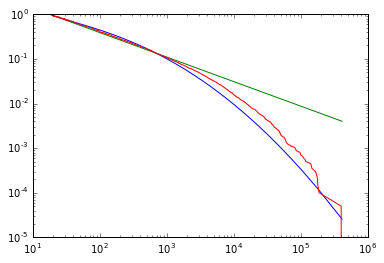

In [145]:
plt.plot(tail, 1 - pyreto.distributions.LogNormal.cdf(tail, **result.params))
plt.plot(tail, 1 - pyreto.distributions.Pareto.cdf(tail, **result4.params))
plt.plot(tail, 1 - pyreto.distributions.Pareto.ecdf(tail))
plt.yscale('log')
plt.xscale('log')

In [122]:
pyreto.pyreto.vuong_likelihood_ratio_test??

In [146]:
pyreto.pyreto.vuong_likelihood_ratio_test(result4, result)

(-3.1609975220707209, 0.00078614918016773174, 0.0015722983603354635)

<h2> Weblinks </h2>

In [58]:
weblinks_histogram = pd.read_csv('http://tuvalu.santafe.edu/~aaronc/powerlaws/data/weblinks.hist', sep='\t')

In [59]:
weblinks_histogram.describe()

,degree,frequency
count,1.448000e+04,1.448000e+04
mean,1.549990e+04,1.910143e+04
std,3.657173e+04,1.022556e+06
min,0.000000e+00,1.000000e+00
25%,3.619750e+03,1.000000e+00
50%,7.468500e+03,2.000000e+00
75%,1.475050e+04,1.100000e+01
max,1.199466e+06,1.066498e+08


In [60]:
# convert histogram data into degree series..
raw_counts = np.repeat(weblinks_histogram.degree.values, weblinks_histogram.frequency.values)
weblinks = pd.Series(raw_counts, name='count')

In [23]:
weblinks.describe()

count    2.765887e+08
mean     7.990814e+00
std      3.054431e+02
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      4.000000e+00
max      1.199466e+06
Name: count, dtype: float64

In [10]:
# check that I get same estimate for alpha given reported xmin...
desired_alpha, desired_xmin = 2.336, 3684
result1 = pyreto.distributions.Pareto.fit(weblinks, xmin=desired_xmin)

In [ ]:
np.testing.assert_almost_equal(result1.params['alpha'], desired_alpha, decimal=3)

In [14]:
# check that I get the same estimates for both alpha and xmin using bounded minimization
result2 = pyreto.distributions.Pareto.fit(weblinks, xmin=None, quantile=0.9999, method='bounded')

AssertionError: 
Arrays are not almost equal to 3 decimals
 ACTUAL: 2.3261940228265701
 DESIRED: 2.336

In [ ]:
np.testing.assert_almost_equal(result2.params['alpha'], desired_alpha, decimal=3)

In [17]:
test_scaling_threshold_estimation(desired_xmin, result2, decimal=1)

AssertionError: 
Arrays are not almost equal to 1 decimals
 ACTUAL: 3213.9999650697919
 DESIRED: 3684

<h2> Cities </h2>

In [147]:
cities = pd.read_csv('http://tuvalu.santafe.edu/~aaronc/powerlaws/data/cities.txt', names=['population'])
cities.population /= 1e3  # CSN units are in thousands of persons

In [148]:
cities.describe()

,population
count,19447.000000
mean,9.002051
std,77.825051
min,0.001000
25%,0.369500
50%,1.089000
75%,4.135500
max,8008.654000


In [149]:
# check that I get same estimate for alpha given reported xmin...
desired_alpha, desired_xmin = 2.37, 52.46
result1 = pyreto.distributions.Pareto.fit(cities.population, scale=desired_xmin)

In [151]:
np.testing.assert_almost_equal(result1.params['b'] + 1, desired_alpha, decimal=2)

In [152]:
# check that I get the same estimates for both alpha and xmin using brute force minimization
result2 = pyreto.distributions.Pareto.fit(cities.population, scale=None, quantile=0.99, method='brute')

In [154]:
np.testing.assert_almost_equal(result2.params['b'] + 1, desired_alpha, decimal=2)

AssertionError: 
Arrays are not almost equal to 2 decimals
 ACTUAL: 2.3649054862087588
 DESIRED: 2.37

In [156]:
np.testing.assert_almost_equal(result2.params['scale'], desired_xmin, decimal=2)

AssertionError: 
Arrays are not almost equal to 2 decimals
 ACTUAL: 52.648000000000003
 DESIRED: 52.46

In [157]:
# check that I get the same estimates for both alpha and xmin using bounded minimization
result3 = pyreto.distributions.Pareto.fit(cities.population, scale=None, quantile=0.99, method='bounded')

In [158]:
np.testing.assert_almost_equal(result3.params['b'] + 1, desired_alpha, decimal=2)

In [159]:
np.testing.assert_almost_equal(result2.params['scale'], desired_xmin, decimal=2)

AssertionError: 
Arrays are not almost equal to 2 decimals
 ACTUAL: 52.648000000000003
 DESIRED: 52.46

In [160]:
# check that I get the same estimates for both alpha and xmin using bounded minimization
result4 = pyreto.distributions.Pareto.fit(cities.population, scale=None, quantile=0.99,
                                          normalize=True, method='bounded')

In [161]:
np.testing.assert_almost_equal(result4.params['b'] + 1, desired_alpha, decimal=2)

AssertionError: 
Arrays are not almost equal to 2 decimals
 ACTUAL: 2.3416090043282578
 DESIRED: 2.37

In [163]:
np.testing.assert_almost_equal(result4.params['scale'], desired_xmin, decimal=2)

AssertionError: 
Arrays are not almost equal to 2 decimals
 ACTUAL: 47.579685128829937
 DESIRED: 52.46

In [165]:
# using brute force minmization to find xmin makes this test take a while!
pvalue, Ds = pyreto.distributions.Pareto.test_goodness_of_fit(42, result2, cities.population, quantile=0.99,
                                                              method='bounded')

In [166]:
# pareto distribution should not be rejected...
assert pvalue > 0.10

AssertionError: 

In [167]:
pvalue

0.025583946622790312

In [168]:
xmin = result4.params['scale']
_, tail = pyreto.distributions.Pareto._split_data(cities.population, xmin)
result = pyreto.distributions.LogNormal.fit(tail, floc=xmin)

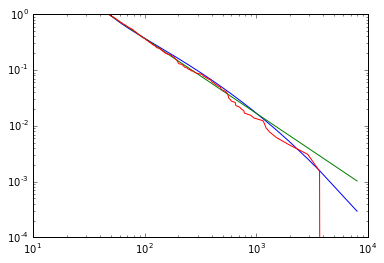

In [169]:
plt.plot(tail, 1 - pyreto.distributions.LogNormal.cdf(tail, **result.params))
plt.plot(tail, 1 - pyreto.distributions.Pareto.cdf(tail, **result4.params))
plt.plot(tail, 1 - pyreto.distributions.Pareto.ecdf(tail))
plt.yscale('log')
plt.xscale('log')

In [170]:
pyreto.pyreto.vuong_likelihood_ratio_test(result4, result)

(1.9218333808922552, 0.97268663670759448, 0.054626726584811047)

<h2> Terrorist attacks </h2>

In [173]:
terrorism = pd.read_csv('http://tuvalu.santafe.edu/~aaronc/powerlaws/data/terrorism.txt', names=['deaths'])

In [174]:
terrorism.describe()

,deaths
count,9101.000000
mean,4.345676
std,31.575005
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,2749.000000


In [180]:
# check that I get same estimate for alpha given reported xmin...
desired_alpha, desired_xmin = 2.4, 12

In [186]:
def compare_estimation_results(data, scale, quantile):
    
    results = []
    
    # check that I get the same estimate for alpha given reported xmin
    result1 = pyreto.distributions.Pareto.fit(data, scale=scale)
    results.append(result1)
    
    # check that I get the same estimates for both alpha and xmin using brute force minimization
    kwargs = {'scale': None, 'quantile': quantile, 'normalize': False, 'method': 'brute'}
    result2 = pyreto.distributions.Pareto.fit(data, **kwargs)
    results.append(result2)

    # check that I get the same estimates for both alpha and xmin using bounded minimization
    kwargs = {'scale': None, 'quantile': quantile, 'normalize': False, 'method': 'bounded'}
    result3 = pyreto.distributions.Pareto.fit(data, **kwargs)
    results.append(result3)

    # check that I get the same estimates for both alpha and xmin using bounded minimization
    kwargs = {'scale': None, 'quantile': quantile, 'normalize': True, 'method': 'bounded'}
    result4 = pyreto.distributions.Pareto.fit(data, **kwargs)
    results.append(result4)

    return results

In [ ]:



def replicate_clauset_shalizi_newman_analysis(data):
    

    # vuong likelihood ratio tests of Pareto vs various alternatives...
    likelihood_test_results = replicate_vuong_test_results()
    
    return result1, result2, pvalue, likelihood_test_results


In [187]:
results = compare_estimation_results(terrorism.deaths, scale=12, quantile=0.99)

In [182]:
result1.params

{'b': 1.2823659930488061, 'loc': 0, 'scale': 12}

In [183]:
result2.params

{'b': 1.4342599218140464, 'loc': 0, 'scale': 39}

In [184]:
result3.params

{'b': 1.3546173256134475, 'loc': 0, 'scale': 24.182390270626183}

In [185]:
result4.params

{'b': 1.3964380842831543, 'loc': 0, 'scale': 28.517656860656377}

In [ ]:
result1

<h2> Electricity blackouts </h2>

In [204]:
blackouts = pd.read_csv('http://tuvalu.santafe.edu/~aaronc/powerlaws/data/blackouts.txt', names=['population'])
blackouts.population /= 1e3

In [205]:
blackouts.describe()

,population
count,211.000000
mean,253.868682
std,610.308581
min,1.000000
25%,40.455500
50%,92.000000
75%,244.455000
max,7500.000000


In [206]:
results = compare_estimation_results(blackouts.population, scale=230, quantile=0.99)

In [208]:
results[0].params

{'b': 1.2510670974602838, 'loc': 0, 'scale': 230}

<h2>Frequency of solar flares</h2>

In [210]:
solar_flares = pd.read_csv('http://tuvalu.santafe.edu/~aaronc/powerlaws/data/flares.txt', names=['frequency'])

In [214]:
desired_alpha, desired_xmin = 1.79, 323

In [215]:
solar_flare_results = compare_estimation_results(solar_flares.frequency, scale=323, quantile=0.99)

In [216]:
actual_alpha = solar_flare_results[0].params['b'] + 1

In [217]:
np.testing.assert_almost_equal(actual_alpha, desired_alpha, decimal=2)

In [218]:
solar_flare_results[1].params

{'b': 0.78832276582913308, 'loc': 0, 'scale': 315}

In [219]:
solar_flare_results[2].params

{'b': 0.78823272389532306, 'loc': 0, 'scale': 327.76257665311414}

In [220]:
solar_flare_results[3].params

{'b': 0.84153583221308637, 'loc': 0, 'scale': 5147.9622698646617}

In [221]:
solar_flare_results[3].n_tail

201